<a href="https://colab.research.google.com/github/sxyang1206/Social_media_analysis_2024/blob/main/Social_Media_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
pip install rapidfuzz datasketch textblob

In [ ]:
import pandas as pd
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from concurrent.futures import ProcessPoolExecutor
import json
from functools import partial

In [ ]:
df_tesco = pd.read_json('/content/drive/MyDrive/Colab Notebooks/social media/drive-download-20240505T090316Z-001/tesco.json')
df_tesco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96702 entries, 0 to 96701
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   created_at                 96702 non-null  datetime64[ns]
 1   id                         96702 non-null  int64         
 2   id_str                     96702 non-null  int64         
 3   text                       96702 non-null  object        
 4   display_text_range         46972 non-null  object        
 5   source                     96697 non-null  object        
 6   truncated                  96702 non-null  bool          
 7   in_reply_to_status_id      39415 non-null  float64       
 8   in_reply_to_status_id_str  39415 non-null  float64       
 9   in_reply_to_user_id        49910 non-null  float64       
 10  in_reply_to_user_id_str    49910 non-null  float64       
 11  in_reply_to_screen_name    49113 non-null  object        
 12  user     

In [ ]:
df_sainsb = pd.read_json('/content/drive/MyDrive/Colab Notebooks/social media/drive-download-20240505T090316Z-001/sainsburys.json')
df_sainsb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82821 entries, 0 to 82820
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   created_at                 82821 non-null  datetime64[ns]
 1   id                         82821 non-null  int64         
 2   id_str                     82821 non-null  int64         
 3   text                       82821 non-null  object        
 4   display_text_range         45732 non-null  object        
 5   source                     82820 non-null  object        
 6   truncated                  82821 non-null  bool          
 7   in_reply_to_status_id      40277 non-null  float64       
 8   in_reply_to_status_id_str  40277 non-null  float64       
 9   in_reply_to_user_id        49755 non-null  float64       
 10  in_reply_to_user_id_str    49755 non-null  float64       
 11  in_reply_to_screen_name    48705 non-null  object        
 12  user     

In [ ]:
df_waitr = pd.read_json('/content/drive/MyDrive/Colab Notebooks/social media/drive-download-20240505T090316Z-001/waitrose.json')
df_waitr.head(5)

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,matching_rules,display_text_range,retweeted_status,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_entities,scopes
0,2020-07-29 10:28:58,1288421250000000000,1288421250000000000,RT @HelpThemHelpUs_: Our friends at @Potsandco...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,[{'tag': None}],None,{'created_at': 'Tue Jul 28 16:29:56 +0000 2020...,NaN,NaN,NaN,None,None,None,NaN
1,2020-11-17 16:31:19,1328737494000000000,1328737494000000000,@HOOODINIIII @roh17h @Samuel51 @sainsburys @Ma...,"<a href=""http://twitter.com/download/iphone"" r...",False,1.328654e+18,1.328654e+18,1.327758e+18,1.327758e+18,...,[{'tag': None}],"[57, 133]",None,NaN,NaN,NaN,None,None,None,NaN
2,2020-02-28 20:19:01,1233486785000000000,1233486785000000000,@waitrose the wine you delivered yesterday was...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,4.632874e+07,4.632874e+07,...,[{'tag': None}],None,None,NaN,NaN,NaN,None,None,None,NaN
3,2020-11-13 09:21:04,1327179666000000256,1327179666000000256,RT @jlandpartners: This Christmas we want to #...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,[{'tag': None}],None,{'created_at': 'Fri Nov 13 07:00:00 +0000 2020...,NaN,NaN,NaN,None,None,None,NaN
4,2020-06-04 20:54:01,1268647218000000000,1268647218000000000,RT @RebeccaTillett1: @waitrose if the U.K. ach...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,[{'tag': None}],None,{'created_at': 'Thu Jun 04 16:31:25 +0000 2020...,NaN,NaN,NaN,None,None,None,NaN


In [ ]:
def clean_comment1(df_comment):
  df_comment = df_comment[df_comment['truncated'] == True]

  df_comment = df_comment.drop_duplicates(subset=['text'],keep=False)

  #count word
  df_comment['Word_Count'] = df_comment['text'].apply(lambda x: len(x.split()))

  df_comment = df_comment[df_comment['Word_Count'] >= 10]

  return df_comment

In [ ]:
df_waitr1 = clean_comment1(df_waitr)
df_tesco1 = clean_comment1(df_tesco)
df_sainsb1 = clean_comment1(df_sainsb)

In [ ]:
df_tesco1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30211 entries, 2 to 96688
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   created_at                 30211 non-null  datetime64[ns]
 1   id                         30211 non-null  int64         
 2   id_str                     30211 non-null  int64         
 3   text                       30211 non-null  object        
 4   display_text_range         19699 non-null  object        
 5   source                     30211 non-null  object        
 6   truncated                  30211 non-null  bool          
 7   in_reply_to_status_id      15112 non-null  float64       
 8   in_reply_to_status_id_str  15112 non-null  float64       
 9   in_reply_to_user_id        21726 non-null  float64       
 10  in_reply_to_user_id_str    21726 non-null  float64       
 11  in_reply_to_screen_name    21433 non-null  object        
 12  user     

In [ ]:
df_waitr1 = df_waitr1[['created_at','text','quote_count','reply_count','retweet_count','favorite_count']].dropna()
df_tesco1 = df_tesco1[['created_at','text','quote_count','reply_count','retweet_count','favorite_count']].dropna()
df_sainsb1 = df_sainsb1[['created_at','text','quote_count','reply_count','retweet_count','favorite_count']].dropna()


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/social media/gist_stopwords.txt'

stopwords_list = []

with open(file_path, 'r') as file:
    for line in file:
        cleaned_line = line.strip()
        if cleaned_line:
            stopwords_list.append(cleaned_line)
stopwords_list = stopwords_list[0]
stopwords_list = stopwords_list.split(",")

In [ ]:
def clean_comment(text):
  text = re.sub(r'\b\d{1,2}[-/]\d{1,2}[-/]\d{2,4}\b|\b\d{1,2}:\d{2}(?::\d{2})?\b|<.*?>|http\S+|@\w+', '', text)

  text = re.sub('[^A-Za-z0-9\s]+', '', text).lower()
  words = text.split()

  words = [word.lower().translate(str.maketrans('', '', string.punctuation)) for word in words]
  stop_words = stopwords.words('english')
  words = [word for word in words if word not in stop_words]

  lemmatizer = WordNetLemmatizer()
  words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

  processed_text = ' '.join(words)

  blob = TextBlob(processed_text)

  processed_text = blob.correct()
  text = str(processed_text).split()

  text = [word for word in text if word not in stop_words]
  wtr = ['dont','really','absolutely','sainsburys','can','not']
  text = [word for word in text if word not in wtr]
  text = ' '.join(text)
  return str(text)


def parallel_clean_comments(df):
    with ProcessPoolExecutor() as executor:
        cleaned_texts = list(executor.map(clean_comment, df['text']))
    return cleaned_texts

In [ ]:
df_tesco1.describe()

,created_at,quote_count,reply_count,retweet_count,favorite_count
count,30211,30211.000000,30211.000000,30211.000000,30211.000000
mean,2020-06-16 23:54:26.649730304,0.103869,0.846149,0.710668,3.788355
min,2020-01-01 14:00:00,0.000000,0.000000,0.000000,0.000000
25%,2020-03-24 15:08:59,0.000000,0.000000,0.000000,0.000000
50%,2020-05-20 02:52:48,0.000000,0.000000,0.000000,0.000000
75%,2020-09-07 12:22:19,0.000000,1.000000,0.000000,1.000000
max,2020-12-30 23:52:24,562.000000,1371.000000,2715.000000,12489.000000
std,NaN,3.696962,10.085265,19.343189,96.241024


In [ ]:
df_waitr1['text'] = parallel_clean_comments(df_waitr1)
df_waitr1['Word_Count'] = df_waitr1['text'].apply(lambda x: len(x.split()))
df_waitr1 = df_waitr1[df_waitr1['Word_Count'] >= 5]

df_waitr1.to_csv('/content/drive/MyDrive/Colab Notebooks/social media/drive-download-20240505T090316Z-001/waitrose_clean.csv', index=False)


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
df_tesco1['text'] = parallel_clean_comments(df_tesco1)
df_tesco1['Word_Count'] = df_tesco1['text'].apply(lambda x: len(x.split()))
df_tesco1 = df_tesco1[df_tesco1['Word_Count'] >= 5]

df_tesco1.to_csv('/content/drive/MyDrive/Colab Notebooks/social media/drive-download-20240505T090316Z-001/tesco_clean.csv', index=False)


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
df_sainsb1['text'] = parallel_clean_comments(df_sainsb1)
df_sainsb1['Word_Count'] = df_sainsb1['text'].apply(lambda x: len(x.split()))
df_sainsb1 = df_sainsb1[df_sainsb1['Word_Count'] >= 5]

df_sainsb1.to_csv('/content/drive/MyDrive/Colab Notebooks/social media/drive-download-20240505T090316Z-001/sainsburys_clean.csv', index=False)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
df_waitr1['source'] = 'Waitrose'
df_tesco1['source'] = 'Tesco'
df_sainsb1['source'] = 'Sainsbury'

<ipython-input-294-af540ae36462>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sainsb1['source'] = 'Sainsbury'


In [ ]:
df_combined = pd.concat([df_waitr1, df_tesco1, df_sainsb1], ignore_index=True)
df_combined = df_combined.drop_duplicates(subset=['text'],keep=False)
df_combined = df_combined.reset_index(drop=True)

df_combined.to_csv('/content/drive/MyDrive/Colab Notebooks/social media/drive-download-20240505T090316Z-001/combine.csv', index=False)


In [ ]:
df_combined = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/social media/drive-download-20240505T090316Z-001/combine.csv')

In [ ]:
df_combined['source'].value_counts()

source
Tesco        24639
Sainsbury    24559
Waitrose      5501
Name: count, dtype: int64

In [ ]:
df_combined['Dominant_Emotion'].value_counts()

Dominant_Emotion
NEUTRAL     35180
NEGATIVE    10567
POSITIVE     8952
Name: count, dtype: int64

BERT

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import numpy as np
from scipy.special import softmax
import pandas as pd
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
def sentiment_analysis(text):
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    return scores

labels = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']

results = df_combined['text'].apply(sentiment_analysis)

for i, label in enumerate(labels):
    df_combined[label] = results.apply(lambda x: np.round(float(x[i]), 4))

df_combined.head()

,created_at,text,quote_count,reply_count,retweet_count,favorite_count,Word_Count,source,NEGATIVE,NEUTRAL,POSITIVE
0,2020-10-01 07:57:48,used enjoy waitrose leckford free range chicke...,0,0,0,0,10,Waitrose,0.1804,0.6269,0.1926
1,2020-12-13 10:55:02,come time supermarket committed exclusively pe...,0,0,0,0,8,Waitrose,0.0232,0.6767,0.3000
2,2020-02-21 18:02:35,dear buy nut safe kinnerton folly waitrose amp...,0,1,0,1,12,Waitrose,0.1343,0.8250,0.0407
3,2020-08-24 18:03:21,sorry hear paul could please u email address p...,0,0,0,0,10,Waitrose,0.1794,0.7384,0.0821
4,2020-12-29 18:59:06,waitrose basically funnel everybody wee tight ...,0,1,0,0,8,Waitrose,0.1507,0.8122,0.0371


In [ ]:
labels = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']


def dominant_emotion(row):
    emotions = {label: row[label] for label in labels}
    dominant = max(emotions, key=emotions.get)
    return dominant, emotions[dominant]

df_combined['Dominant_Emotion'], df_combined['Dominant_Score'] = zip(*df_combined.apply(dominant_emotion, axis=1))


In [ ]:
df_combined.to_csv('/content/drive/MyDrive/Colab Notebooks/social media/drive-download-20240505T090316Z-001/combine.csv', index=False)


In [ ]:
df_neg = df_combined[df_combined['Dominant_Emotion'] == 'NEGATIVE']

In [ ]:
df_neg.describe()

,created_at,quote_count,reply_count,retweet_count,favorite_count,Word_Count,NEGATIVE,NEUTRAL,POSITIVE,Dominant_Score
count,10567,10567.000000,10567.000000,10567.000000,10567.000000,10567.000000,10567.000000,10567.000000,10567.000000,10567.000000
mean,2020-07-01 22:38:34.090565120,0.148292,1.014290,0.925428,5.404561,8.751017,0.726410,0.257070,0.016520,0.726410
min,2020-01-01 16:19:14,0.000000,0.000000,0.000000,0.000000,5.000000,0.382900,0.016500,0.001700,0.382900
25%,2020-03-27 14:09:37,0.000000,0.000000,0.000000,0.000000,7.000000,0.594800,0.136550,0.006900,0.594800
50%,2020-06-18 18:47:37,0.000000,0.000000,0.000000,0.000000,9.000000,0.727000,0.257500,0.012500,0.727000
75%,2020-10-05 17:14:34,0.000000,1.000000,0.000000,1.000000,10.000000,0.855650,0.379900,0.020500,0.855650
max,2020-12-30 23:40:38,313.000000,1655.000000,3274.000000,10818.000000,19.000000,0.980900,0.493800,0.255000,0.980900
std,NaN,4.756145,16.963877,33.911219,146.405285,2.101033,0.147034,0.137534,0.016237,0.147034


LDA

In [ ]:
import gensim
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora

In [ ]:
df_neg = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/social media/drive-download-20240505T090316Z-001/neg.csv')

In [ ]:
def extract_topics(lda_model, num_topics):
    topic_data = []
    for i in range(num_topics):
        words = lda_model.show_topic(i, topn=10)
        for word, prob in words:
            topic_data.append([i, word, round(prob, 4)])
    return pd.DataFrame(topic_data, columns=['Topic', 'Keyword', 'Score'])

In [ ]:
stop_words = set(stopwords_list)
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

df_neg['Tokenized_Review'] = df_neg['text'].apply(preprocess_text)

dictionary = corpora.Dictionary(df_neg['Tokenized_Review'])
dictionary.filter_extremes(no_below=5, no_above=0.9)
corpus = [dictionary.doc2bow(doc) for doc in df_neg['Tokenized_Review']]

In [ ]:
coherence_values_cv = []
coherence_values_umass = []
coherence_values_c_npmi = []
model_list = []

for num_topics in range(2, 11):
    lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=80)
    model_list.append(lda_model)

    coherence_model_cv = CoherenceModel(model=lda_model, texts=df_neg['Tokenized_Review'], dictionary=dictionary, coherence='c_v')
    coherence_value_cv = coherence_model_cv.get_coherence()
    coherence_values_cv.append(coherence_value_cv)

    coherence_model_umass = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    coherence_value_umass = coherence_model_umass.get_coherence()
    coherence_values_umass.append(coherence_value_umass)

    coherence_model_c_npmi = CoherenceModel(model=lda_model, texts=df_neg['Tokenized_Review'], dictionary=dictionary, coherence='c_npmi')
    coherence_value_c_npmi = coherence_model_c_npmi.get_coherence()
    coherence_values_c_npmi.append(coherence_value_c_npmi)

    print(f"Num Topics: {num_topics}, c_v Coherence Value: {coherence_value_cv}, u_mass Coherence Value: {coherence_value_umass}， c_npmi Coherence Value: {coherence_value_c_npmi}")

best_num_topics_cv = coherence_values_cv.index(max(coherence_values_cv)) + 2
print(f"Best Number of Topics based on c_v: {best_num_topics_cv}")

best_num_topics_umass = coherence_values_umass.index(max(coherence_values_umass)) + 2
print(f"Best Number of Topics based on u_mass: {best_num_topics_umass}")

best_num_topics_c_npmi = coherence_values_c_npmi.index(max(coherence_values_c_npmi)) + 2
print(f"Best Number of Topics based on c_npmi: {best_num_topics_c_npmi}")

Num Topics: 2, c_v Coherence Value: 0.2896778383681512, u_mass Coherence Value: -5.050729656517884， c_npmi Coherence Value: -0.026577956647844146
Num Topics: 3, c_v Coherence Value: 0.28266564511848574, u_mass Coherence Value: -6.381529026558849， c_npmi Coherence Value: -0.053775699885304395
Num Topics: 4, c_v Coherence Value: 0.3043762668155733, u_mass Coherence Value: -6.1004106530782245， c_npmi Coherence Value: -0.0410257370897129
Num Topics: 5, c_v Coherence Value: 0.3108608778411088, u_mass Coherence Value: -6.6159672820897715， c_npmi Coherence Value: -0.0635276961509069
Num Topics: 6, c_v Coherence Value: 0.32629071912513535, u_mass Coherence Value: -7.214641707018544， c_npmi Coherence Value: -0.07168553184718053
Num Topics: 7, c_v Coherence Value: 0.31325901975225123, u_mass Coherence Value: -7.985345628476106， c_npmi Coherence Value: -0.09996360697410085
Num Topics: 8, c_v Coherence Value: 0.3429036337410848, u_mass Coherence Value: -8.550689584579585， c_npmi Coherence Value: -

In [ ]:
dictionary = corpora.Dictionary(df_neg['Tokenized_Review'])
dictionary.filter_extremes(no_below=5, no_above=0.9)
corpus = [dictionary.doc2bow(doc) for doc in df_neg['Tokenized_Review']]
lda_model = LdaModel(corpus, num_topics=6, id2word=dictionary, passes=200)

topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)





(0, '0.017*"test" + 0.017*"wrong" + 0.014*"bad" + 0.013*"day" + 0.012*"thing" + 0.012*"2" + 0.011*"store" + 0.011*"feel" + 0.010*"bought" + 0.009*"ago"')
(1, '0.072*"delivery" + 0.034*"order" + 0.025*"online" + 0.025*"slot" + 0.019*"customer" + 0.018*"service" + 0.018*"item" + 0.016*"phone" + 0.015*"driver" + 0.015*"week"')
(2, '0.050*"racism" + 0.043*"people" + 0.041*"vulnerable" + 0.020*"black" + 0.019*"white" + 0.018*"family" + 0.018*"avert" + 0.015*"extremely" + 0.013*"risk" + 0.013*"person"')
(3, '0.022*"plastic" + 0.014*"amp" + 0.012*"sad" + 0.012*"big" + 0.011*"meat" + 0.010*"test" + 0.010*"government" + 0.010*"car" + 0.009*"chicken" + 0.009*"sell"')
(4, '0.077*"people" + 0.022*"supermarket" + 0.015*"buying" + 0.012*"disgusting" + 0.012*"ridiculous" + 0.012*"mask" + 0.012*"panic" + 0.012*"lot" + 0.011*"problem" + 0.011*"buy"')
(5, '0.046*"store" + 0.043*"staff" + 0.037*"time" + 0.023*"customer" + 0.018*"today" + 0.013*"disappointed" + 0.013*"people" + 0.012*"social" + 0.012*"sho

In [ ]:
dictionary = corpora.Dictionary(df_neg['Tokenized_Review'])
dictionary.filter_extremes(no_below=5, no_above=0.9)
corpus = [dictionary.doc2bow(doc) for doc in df_neg['Tokenized_Review']]
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=200)

topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)





(0, '0.026*"people" + 0.024*"store" + 0.014*"poor" + 0.013*"test" + 0.013*"staff" + 0.012*"number" + 0.011*"shop" + 0.010*"lot" + 0.008*"car" + 0.008*"hear"')
(1, '0.050*"vulnerable" + 0.033*"delivery" + 0.028*"slot" + 0.026*"year" + 0.018*"elderly" + 0.016*"disabled" + 0.015*"sum" + 0.014*"unable" + 0.014*"extremely" + 0.013*"person"')
(2, '0.022*"people" + 0.022*"food" + 0.017*"mask" + 0.016*"order" + 0.015*"shop" + 0.013*"time" + 0.011*"amp" + 0.010*"online" + 0.009*"buying" + 0.009*"plastic"')
(3, '0.057*"people" + 0.046*"racism" + 0.018*"black" + 0.018*"white" + 0.016*"avert" + 0.014*"family" + 0.012*"christmas" + 0.010*"sad" + 0.009*"supermarket" + 0.009*"stupid"')
(4, '0.037*"delivery" + 0.032*"customer" + 0.023*"staff" + 0.022*"service" + 0.019*"store" + 0.016*"week" + 0.016*"item" + 0.014*"order" + 0.012*"shopping" + 0.012*"driver"')


In [ ]:
dictionary = corpora.Dictionary(df_neg['Tokenized_Review'])
dictionary.filter_extremes(no_below=5, no_above=0.9)
corpus = [dictionary.doc2bow(doc) for doc in df_neg['Tokenized_Review']]
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=200)

topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)





(0, '0.041*"delivery" + 0.024*"vulnerable" + 0.019*"order" + 0.016*"online" + 0.014*"slot" + 0.014*"week" + 0.013*"year" + 0.013*"customer" + 0.011*"time" + 0.010*"item"')
(1, '0.069*"people" + 0.027*"racism" + 0.016*"supermarket" + 0.012*"mask" + 0.011*"black" + 0.010*"white" + 0.010*"family" + 0.009*"avert" + 0.008*"amp" + 0.008*"buy"')
(2, '0.032*"store" + 0.024*"staff" + 0.018*"test" + 0.015*"customer" + 0.012*"disappointed" + 0.011*"bad" + 0.011*"today" + 0.010*"wrong" + 0.009*"plastic" + 0.008*"time"')


In [ ]:
topic_keywords = {}
for i, topic in lda_model.show_topics(formatted=False, num_words=10):
    topic_keywords[i] = [word for word, prob in topic]

In [ ]:
doc_topics = [lda_model.get_document_topics(bow) for bow in corpus]

def get_dominant_topic(doc_topics):
    return max(doc_topics, key=lambda x: x[1])[0]

df_neg['Topic'] = [get_dominant_topic(doc) for doc in doc_topics]

In [ ]:
df_neg['Topic'].value_counts()

Topic
1    3697
0    3482
2    3388
Name: count, dtype: int64

In [ ]:
df_neg.to_csv('/content/drive/MyDrive/Colab Notebooks/social media/drive-download-20240505T090316Z-001/neg.csv', index=False)


In [ ]:
import seaborn as sns

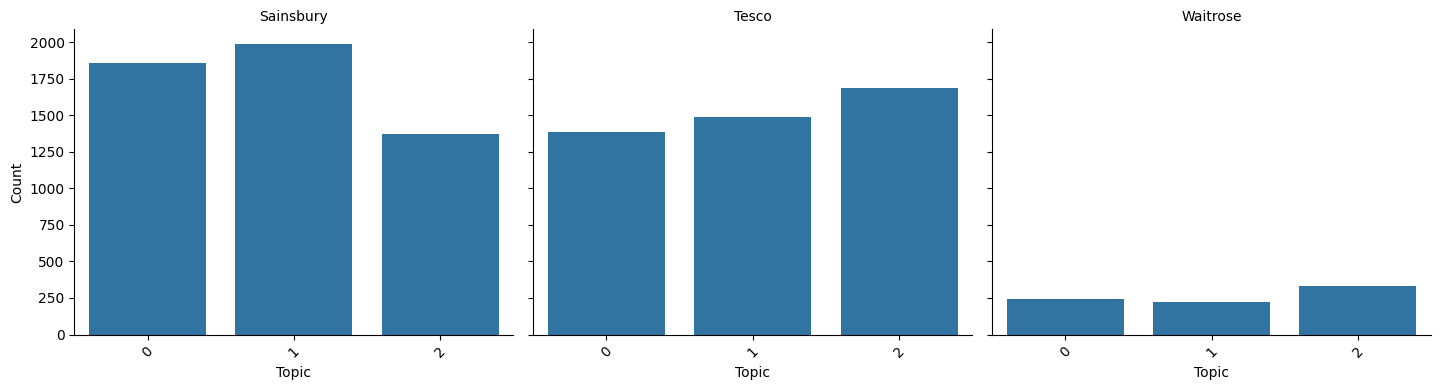

In [ ]:
topic_distribution = df_neg.groupby(['source', 'Topic']).size().reset_index(name='count')

topic_distribution['source_topic'] = topic_distribution['source'] + '_' + topic_distribution['Topic'].astype(str)

g = sns.catplot(
    x='Topic',
    y='count',
    col='source',
    data=topic_distribution,
    kind='bar',
    col_wrap=3,
    height=4,
    aspect=1.2
)

g.set_titles("{col_name}")
g.set_axis_labels("Topic", "Count")
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/social media/Topic.jpg')
plt.show()

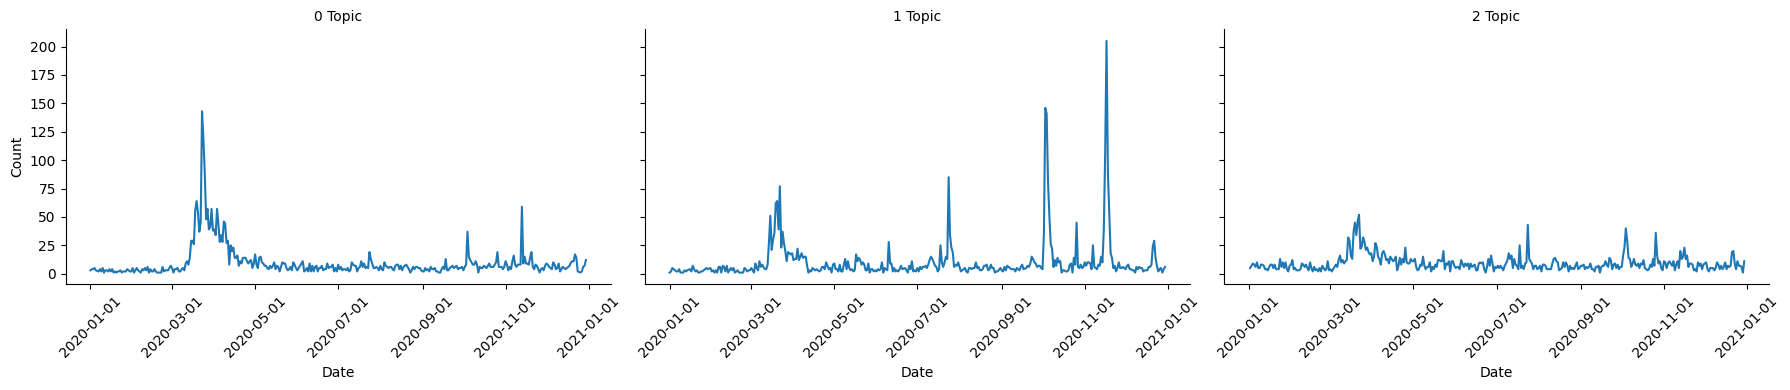

In [ ]:
df_neg['created_at'] = pd.to_datetime(df_neg['created_at']).dt.date

daily_topic_counts = df_neg.groupby(['created_at', 'Topic']).size().reset_index(name='count')

g = sns.FacetGrid(daily_topic_counts, col='Topic', col_wrap=3, height=4, aspect=1.5)
g.map_dataframe(sns.lineplot, x='created_at', y='count')

g.set_axis_labels("Date", "Count")
g.set_titles("{col_name} Topic")
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/social media/Time.jpg')
plt.show()

Time Series

KeyGraph

In [ ]:
from gensim import corpora, models
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter, defaultdict


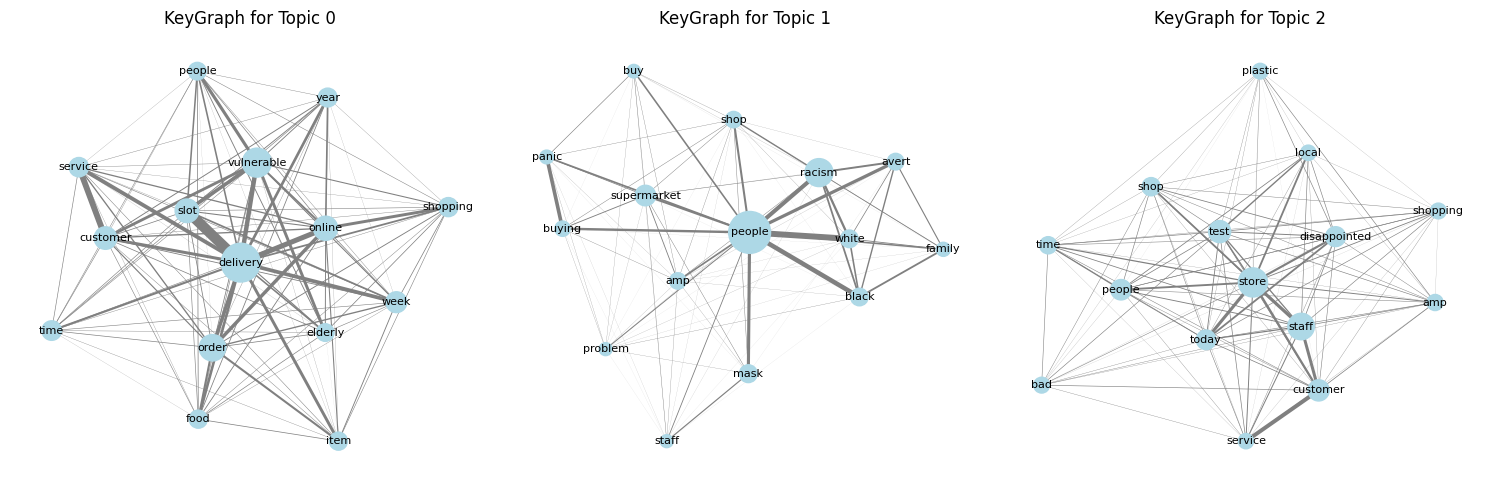

In [ ]:
topics = sorted(df_neg['Topic'].unique())

fig, axs = plt.subplots(1, len(topics), figsize=(15, 5))
window_size = 4

for i, topic in enumerate(topics):

    topic_documents = df_neg[df_neg['Topic'] == topic]['Tokenized_Review']


    all_words_in_topic = [word for words_list in topic_documents for word in words_list]
    word_freq = Counter(all_words_in_topic)
    most_common_words = dict(word_freq.most_common(15))

    co_occurrence = defaultdict(int)

    for words_list in topic_documents:
        filtered_words = [word for word in words_list if word in most_common_words]
        for index, word in enumerate(filtered_words):
            window = filtered_words[max(0, index - window_size + 1): index + window_size]
            for other_word in window:
                if word != other_word:
                    pair = tuple(sorted([word, other_word]))
                    co_occurrence[pair] += 1

    G = nx.Graph()

    for word, freq in most_common_words.items():
        G.add_node(word, size=freq)

    for pair, weight in co_occurrence.items():
        G.add_edge(pair[0], pair[1], weight=weight/50)

    sizes = [G.nodes[node]['size'] for node in G]

    weights = [G[u][v]['weight'] for u, v in G.edges()]

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=sizes, font_size=8, edge_color='gray', width=weights, ax=axs[i])
    axs[i].set_title(f"KeyGraph for Topic {topic}")

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/social media/KG.jpg')
plt.show()

In [ ]:
df_neg['source'].value_counts()

source
Sainsbury    5216
Tesco        4558
Waitrose      793
Name: count, dtype: int64